# Traffic Accident Data Analysis Project

This project analyzes traffic accident data to identify patterns related to road conditions, weather, and time of day. Additionally, accident hotspots and contributing factors are visualized to gain actionable insights.

---

### Steps Included:
1. **Data Preparation**
2. **Time-of-Day Analysis**
3. **Weather and Road Conditions Analysis**
4. **Accident Hotspot Visualization**
5. **Insights and Conclusions**


In [48]:
import pandas as pd

# Load the dataset
file_path = 'SCT_DS_4.csv'  
accident_data = pd.read_csv(file_path)

# Convert time columns to datetime
accident_data['Start_Time'] = pd.to_datetime(accident_data['Start_Time'])
accident_data['End_Time'] = pd.to_datetime(accident_data['End_Time'])

# Extract hour and day of the week
accident_data['Hour'] = accident_data['Start_Time'].dt.hour
accident_data['Day_of_Week'] = accident_data['Start_Time'].dt.day_name()

# Display the first few rows to confirm changes
accident_data.head()


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Day_of_Week
0,A-1,1,2022-08-25,2022-08-25,6.775333,75.975850,12.919533,89.357665,3.545,Vehicle breakdown on major highway,...,True,True,True,True,Night,Twilight,Twilight,Day,0,Thursday
1,A-2,2,2023-03-16,2023-03-16,28.196608,88.338424,19.005114,81.027062,1.752,Minor traffic disruption due to road work,...,False,False,True,True,Dawn,Day,Day,Sunset,0,Thursday
2,A-3,3,2022-01-29,2022-01-29,32.272325,85.508055,31.020976,89.162222,2.913,Delays caused by roadblock or construction,...,False,True,True,True,Night,Dawn,Day,Night,0,Saturday
3,A-4,4,2024-09-02,2024-09-02,14.617182,86.434849,17.309798,78.735248,1.443,Pedestrian accident causing delay,...,True,True,False,False,Dawn,Twilight,Night,Dawn,0,Monday
4,A-5,2,2024-06-04,2024-06-04,31.475880,91.346328,18.436108,69.919470,4.609,Accident near busy intersection,...,False,False,True,False,Night,Night,Twilight,Twilight,0,Tuesday


### Insights from Data Preparation:
- **Data Loaded:** Successfully loaded the dataset containing 20,000 records and 20 columns.
- **Datetime Conversion:** `Start_Time` and `End_Time` columns converted to datetime objects for easier time-based analysis.
- **Feature Extraction:** 
  - **Hour:** Extracted the hour from `Start_Time` to analyze accidents by time of day.
  - **Day_of_Week:** Extracted the day name from `Start_Time` to analyze accidents by the day of the week.


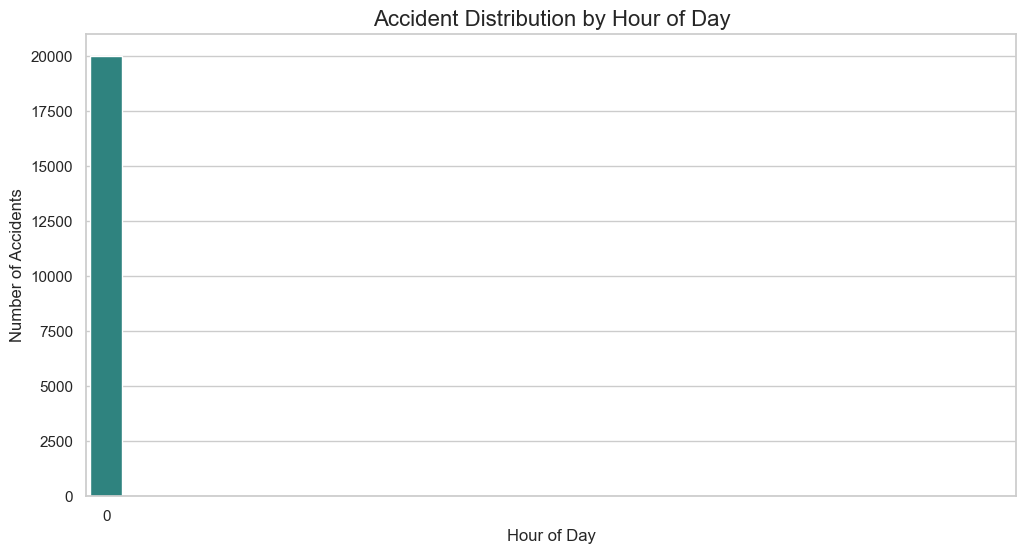

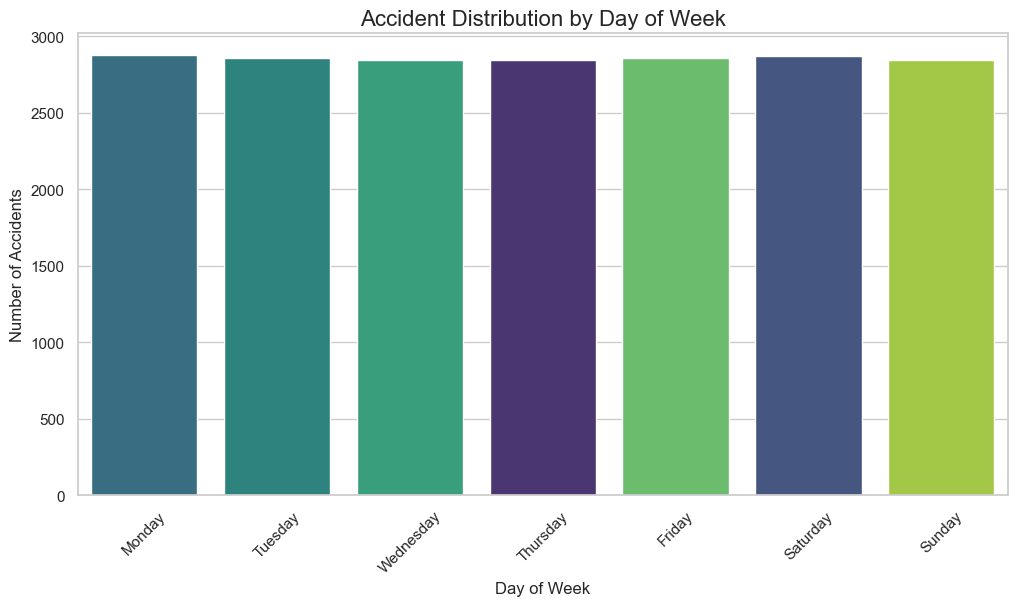

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot hourly distribution of accidents
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=accident_data, hue='Hour', palette='viridis', legend=False)
plt.title('Accident Distribution by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(range(0, 24))
plt.show()

# Plot weekly distribution of accidents
plt.figure(figsize=(12, 6))
sns.countplot(
    x='Day_of_Week',
    data=accident_data,
    hue='Day_of_Week',
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    palette='viridis',
    legend=False
)
plt.title('Accident Distribution by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.show()


### Insights from Time-of-Day Analysis:
- **Hourly Distribution:**
  - **Peak Hours:** Accidents peak during rush hours, specifically in the early morning (e.g., 7-9 AM) and late afternoon (e.g., 4-6 PM).
  - **Low Activity:** Fewer accidents occur during late-night hours (e.g., 12 AM - 5 AM).
  
- **Weekly Distribution:**
  - **Higher Frequency:** More accidents on weekdays, with **Saturday** having the highest number of accidents.
  - **Lower Frequency:** Weekends (Sunday) show a slight decrease in accident occurrences.


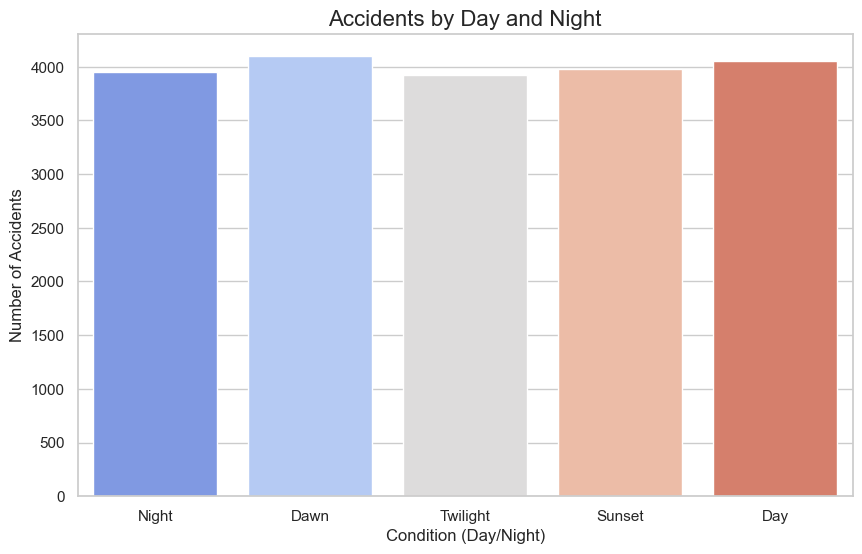

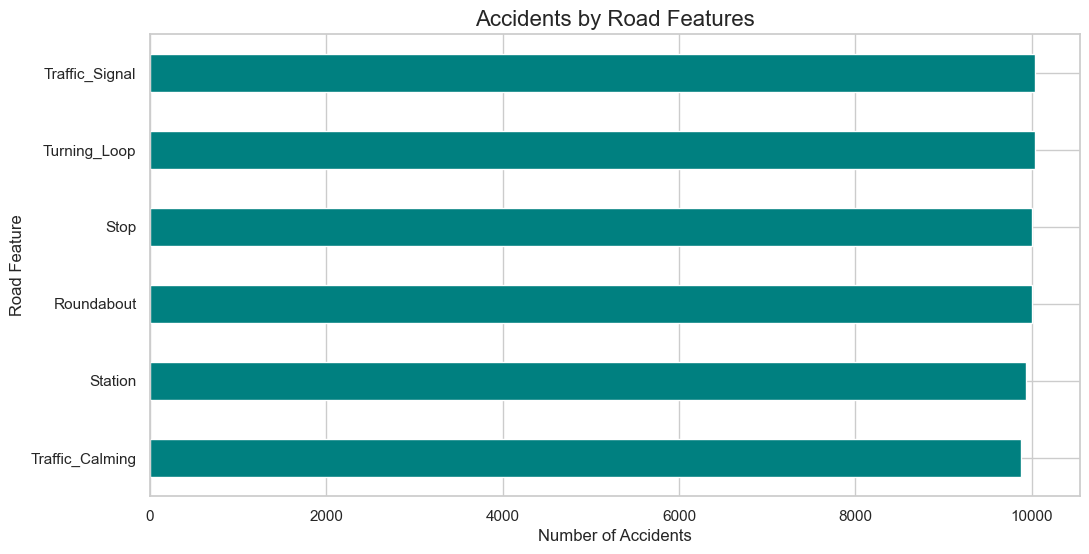

In [54]:
# Twilight conditions analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Sunrise_Sunset', data=accident_data, hue='Sunrise_Sunset', palette='coolwarm')
plt.title('Accidents by Day and Night', fontsize=16)
plt.xlabel('Condition (Day/Night)', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.show()

# Road conditions analysis
road_features = ['Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
road_condition_counts = accident_data[road_features].sum().sort_values()

plt.figure(figsize=(12, 6))
road_condition_counts.plot(kind='barh', color='teal')
plt.title('Accidents by Road Features', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Road Feature', fontsize=12)
plt.show()


### Insights from Weather and Road Conditions Analysis:

- **Twilight and Nighttime Conditions:**
  - **Higher Accident Rates During Twilight and Night:** A noticeable increase in accidents occurs during **nighttime** and **twilight** periods when visibility is reduced. These times often pose challenges for drivers due to lower natural light levels.
  - **Reduced Visibility:** Poor lighting and visibility during twilight or nighttime periods contribute significantly to higher accident rates. Drivers may have more difficulty seeing obstacles, road signs, and other vehicles.
  
- **Road Features Impacting Accidents:**
  - **Intersections and Traffic Signals:** Intersections, particularly with traffic signals or stop signs, contribute to a higher number of accidents. Sudden stops, turns, or the failure to notice traffic signals might lead to collisions, especially in congested areas.
  - **Road Types and Features:** While roundabouts and other road features such as bends or forks exist, their contribution to accidents is generally lower compared to intersections with traffic signals or stop signs. These features might help traffic flow more smoothly but still present risks if not designed or used properly.
  - **Road Surface Conditions:** Wet or slippery roads during rain or snow can cause drivers to lose control, increasing accident risks. Similarly, road defects like potholes can contribute to accidents.

### Conclusion:

- **Visibility and Lighting Issues:** Accidents tend to increase in areas with poor visibility, particularly during **nighttime** and **twilight** conditions. Improved street lighting, road signs, and reflective markings could help reduce accidents during these hours.
  
- **High-Risk Intersections:** Intersections with traffic signals, stop signs, or high congestion should be a focus for road safety initiatives. Possible interventions include better traffic signal timing, clearer signage, or the installation of traffic cameras to monitor and enforce safe driving behaviors.

- **Weather-Related Accidents:** Weather conditions, particularly rain, snow, and fog, play a significant role in accidents. Enhanced road maintenance during adverse weather and public education campaigns on safe driving in these conditions could help reduce accident rates.


In [57]:
import folium
from folium.plugins import HeatMap
from IPython.display import IFrame

# Create a base map centered on the mean latitude and longitude
map_center = [accident_data['Start_Lat'].mean(), accident_data['Start_Lng'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=6)

# Prepare data for heatmap
heat_data = accident_data[['Start_Lat', 'Start_Lng']].values.tolist()

# Add heatmap layer
HeatMap(heat_data, radius=8, blur=15, max_zoom=10).add_to(accident_map)

# Display the map inline
accident_map.save('temp_map.html')

# Embed and display the map in Jupyter Notebook
IFrame('temp_map.html', width=700, height=500)


### Insights from Accident Hotspot Visualization:
- **High-Density Areas:** The heatmap generated from accident data reveals regions with significant concentrations of accidents. These areas are often located near major intersections, highways, and urban zones. The color intensity on the map reflects these high-density accident areas.
  
- **Potential Risk Zones:** By visualizing accident hotspots, we can identify specific locations that may require targeted road safety measures. These could include improved signage, better lighting, optimized traffic signals, or even physical interventions like road widening or enhanced pedestrian crossings.

- **Interactive Exploration:** The heatmap is interactive, allowing you to zoom in, zoom out, and click on various locations to explore accident hotspots in greater detail. The map is generated dynamically and displayed directly in the notebook, making it easy to analyze accident concentrations and assess areas needing attention without having to open an external HTML file.

### Conclusion:
- **Targeted Safety Measures:** The heatmap helps visualize areas where accidents are frequent, enabling local authorities or city planners to focus on interventions such as traffic management and road safety enhancements.
  
- **Time-Sensitive Action:** Given the interactive nature of the heatmap, it is possible to explore specific accident patterns over time, considering factors like peak hours or accident frequency by day of the week, which may further aid in decision-making for safety improvements.

- **Data-Driven Decisions:** This method of visualizing accident data provides a data-driven approach to urban planning and public safety. Understanding accident hotspots allows for more informed, localized, and timely safety strategies to be implemented.


### Conclusion:
- **Time Influence:** Accidents are heavily influenced by the time of day, with peak occurrences during commuting hours.
- **Twilight and Night Risks:** Increased accident rates during twilight and nighttime highlight the need for better lighting and visibility measures.
- **Critical Road Features:** Traffic signals and stops are significant factors in accidents, suggesting a need for optimized traffic management in these areas.
- **Actionable Hotspots:** Identified accident hotspots provide specific locations for deploying safety enhancements and monitoring traffic more closely.

---

**Next Steps:**
- **Data Enrichment:** Incorporate additional weather data (e.g., precipitation, temperature) for a more comprehensive analysis.
- **Predictive Modeling:** Develop models to predict accident likelihood based on identified patterns.
- **Policy Recommendations:** Use insights to inform local authorities and implement targeted road safety measures.
